In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

## Independence ##

Jointly distributed random variables $X$ and $Y$ are *independent* if
$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$
for all intervals $A$ and $B$.

Let $X$ have density $f_X$, let $Y$ have density $f_Y$, and suppose $X$ and $Y$ are independent. Then if $f$ is the joint density of $X$ and $Y$,

$$
\begin{align*}
f(x, y)dxdy &\sim P(X \in dx, Y \in dy) \\
&= P(X \in dx)P(Y \in dy) ~~~~~ \text{(independence)} \\
&= f_X(x)dx f_Y(y)dy \\
&= f_X(x)f_Y(y)dxdy
\end{align*}
$$

Thus if $X$ and $Y$ are independent then their joint density is given by

$$
f(x, y) = f_X(x)f_Y(y)
$$

This is the *product rule for densities*: the joint density of two independent random variables is the product of their densities.

### Independent Standard Normal Random Variables ###
Suppose $X$ and $Y$ are i.i.d. standard normal random variables. Then their joint density is given by

$$
f(x, y) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}y^2}, ~~~~ -\infty < x, y < \infty
$$

Equivalently,
$$
f(x, y) = \frac{1}{2\pi} e^{-\frac{1}{2}(x^2 + y^2)}, ~~~~ -\infty < x, y < \infty
$$

Here is a graph of the joint density surface.

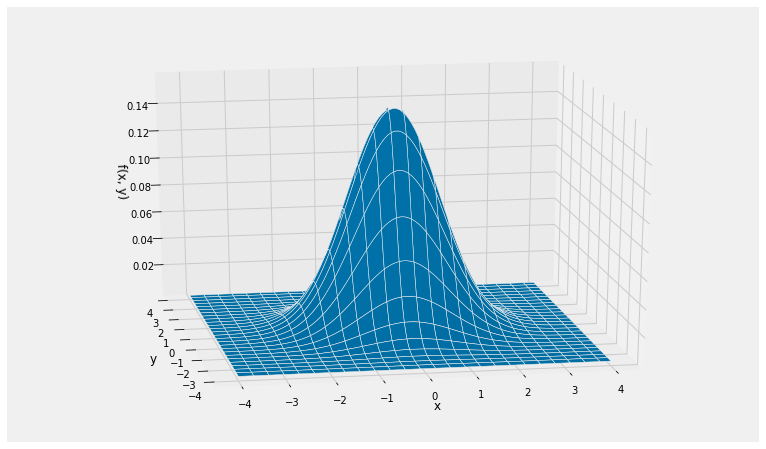

In [2]:
def indep_standard_normals(x,y):
    return 1/(2*math.pi) * np.exp(-0.5*(x**2 + y**2))

Plot_3d((-4, 4), (-4, 4), indep_standard_normals, rstride=4, cstride=4)

Notice the circular symmetry of the surface. This is because the formula for the joint density involves the pair $(x, y)$ through the expression $x^2 + y^2$ which is symmetric in $x$ and $y$.

Notice also that $P(X = Y) = 0$, as the probability is the volume over a line. This is true of all pairs of independent random variables with a joint density: $P(X = Y) = 0$. So for example $P(X > Y) = P(X \ge Y)$. You don't have to worry about whether or not to the inequality should be strict.

### The Larger of Two Independent Exponential Random Variables ###
Let $X$ and $Y$ be independent random variables. Suppose $X$ has the exponential $(\lambda)$ distribution and $Y$ has the exponential $(\mu)$ distribution. The goal of this example is to find $P(Y > X)$.

By the product rule, the joint density of $X$ and $Y$ is given by

$$
f(x, y) ~ = ~ \lambda e^{-\lambda x} \mu e^{-\mu y}, ~~~~ x > 0, ~ y > 0
$$

The graph below shows the joint density surface in the case $\lambda = 0.5$ and $\mu = 0.25$, so that $E(X) = 2$ and $E(Y) = 4$.

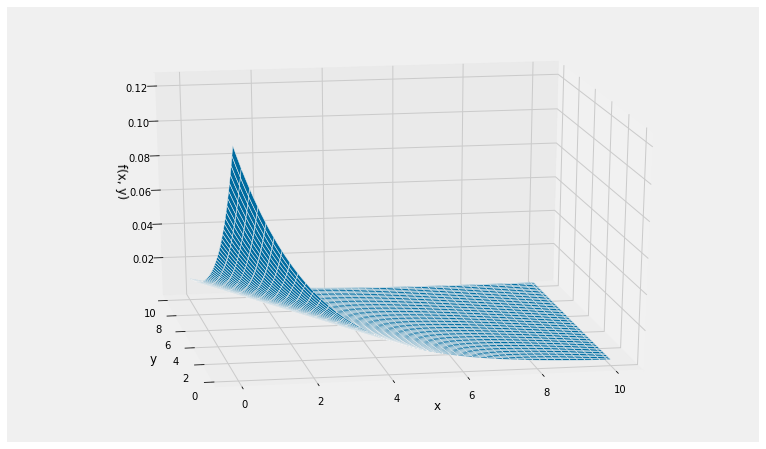

In [3]:
def independent_exp(x, y):
    return 0.5 * 0.25 * np.e**(-0.5*x - 0.25*y)

Plot_3d((0, 10), (0, 10), independent_exp)

To find $P(Y > X)$ we must integrate the joint density over the upper triangle of the first quadrant, a portion of which is shown below.

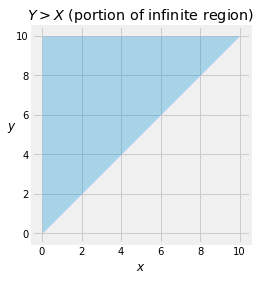

In [4]:
# NO CODE
plt.axes().set_aspect('equal')
xx = np.arange(0, 10.1, 0.1)
yy = 10*np.ones(len(xx))
plt.fill_between(xx, xx, yy, alpha=0.3)
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$Y > X$ (portion of infinite region)');

The probability is therefore
$$
P(Y > X) ~ = ~ \int_0^\infty \int_x^\infty \lambda e^{-\lambda x} \mu e^{-\mu y} dy dx
$$

We can do this double integral without much calculus, just by using probability facts. 

$$
\begin{align*}
P(Y > X) &= \int_0^\infty \int_x^\infty \lambda e^{-\lambda x} \mu e^{-\mu y} dy dx \\ \\
&= \int_0^\infty \lambda e^{-\lambda x} \big{(} \int_x^\infty \mu e^{-\mu y} dy\big{)} dx \\ \\
&= \int_0^\infty \lambda e^{-\lambda x} e^{-\mu x} dx ~~~~~~ \text{(survival function of } Y\text{, evaluated at } x \text{)} \\ \\
&= \frac{\lambda}{\lambda + \mu} \int_0^\infty (\lambda + \mu) e^{-(\lambda + \mu)x} dx \\ \\
&= \frac{\lambda}{\lambda + \mu} ~~~~~~~ \text{(total integral of exponential }
(\lambda + \mu) \text{ density is 1)}
\end{align*}
$$

Thus

$$
P(Y > X) ~ = ~ \frac{\lambda}{\lambda + \mu}
$$

Analogously,

$$
P(X > Y) ~ = ~ \frac{\mu}{\lambda + \mu}
$$

Notice that the two chances are proportional to the parameters. This is consistent with intuition if you think of $X$ and $Y$ as two lifetimes. If $\lambda$ is large, the corresponding lifetime $X$ is likely to be short, and therefore $Y$ is likely to be larger than $X$ as the formula implies.

If $\lambda = \mu$ then $P(Y > X) = 1/2$ which you can see by symmetry since $P(X = Y) = 0$.

If we had attempted the double integral in the other order – first $x$, then $y$ – we would have had to do more work. The integral is

$$
\int_0^\infty \int_0^y \lambda e^{-\lambda x} \mu e^{-\mu y} dx dy
$$

Let's take the easy way out by using `SymPy` to confirm that we will get the same answer.

In [5]:
# Create the symbols; they are all positive

x = Symbol('x', positive=True)
y = Symbol('y', positive=True)
lamda = Symbol('lamda', positive=True)
mu = Symbol('mu', positive=True)

In [6]:
# Construct the expression for the joint density

f_X = lamda * exp(-lamda * x)
f_Y = mu * exp(-mu * y)
joint_density = f_X * f_Y
joint_density

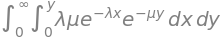

In [7]:
# Display the integral – first x, then y

Integral(joint_density, (x, 0, y), (y, 0, oo))

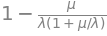

In [8]:
# Evaluate the integral

answer = Integral(joint_density, (x, 0, y), (y, 0, oo)).doit()
answer

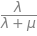

In [9]:
# Confirm that it is the same 
# as what we got by integrating in the other order

simplify(answer)